## Read file after Factor Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import math

import sys
import os
sys.path.append(os.path.abspath(".."))  
sys.path.append(os.path.abspath("./src")) 

from src.data_processing import  process_lonely_observations, modify_species_id
from src.model import scale_features, find_lonely_observations, calculate_confusion_matrix_and_metrics
from src.visualization import plot_dendrogram_lonelylabels, plot_confusion_matrix, plot_outliers, plot_isolated_observations_by_species, plot_isolated_observations


# Load file after Factor Analysis Steps
data_path = "../data/"
output_path = '../output/'

#dataset ='Automatic_Labeling_Kyoogu/'
dataset ='Dataset_1/'
#dataset ='Dataset_2/'

file = 'Reduced_dataframe_FA2.xlsx'
output_file = 'isolated_observations.xlsx'
df_reduced = pd.read_excel(data_path+dataset+file,index_col=0)
df_reduced



,Factor1,Factor2,Factor3,FminVoc,bandwidth,Specie_ID
18,-1.199992,3.504971,-802.455241,1500.0000,128.085949,Boana_platanera
21,7.139431,6.651630,-983.474546,1570.3125,294.216375,Leptodactylus_fuscus
24,4.878908,8.702904,-1060.409103,1968.7500,171.439814,Leptodactylus_fuscus
26,-11.914390,1.998143,-1242.348098,2085.9375,195.304025,Leptodactylus_fuscus
30,6.679592,1.986054,-1091.249990,1921.8750,185.250099,Leptodactylus_fuscus
...,...,...,...,...,...,...
11444,-5.903070,3.501957,-1894.487028,3750.0000,242.506221,Troglodytes_aedon
11445,3.661997,4.552104,-1219.612547,1898.4375,275.569444,Troglodytes_aedon
11451,-2.993427,3.530395,-1941.652206,3867.1875,242.899831,Troglodytes_aedon
11452,12.356116,4.608775,-1227.659540,1734.3750,290.015549,Troglodytes_aedon


## Isolated observations and the percentage of them related to the dataset


The total number of observations is: 1465
The number of lonely observations is: 172
Percentage of lonely observations in relation with the Dataset: 11.74%


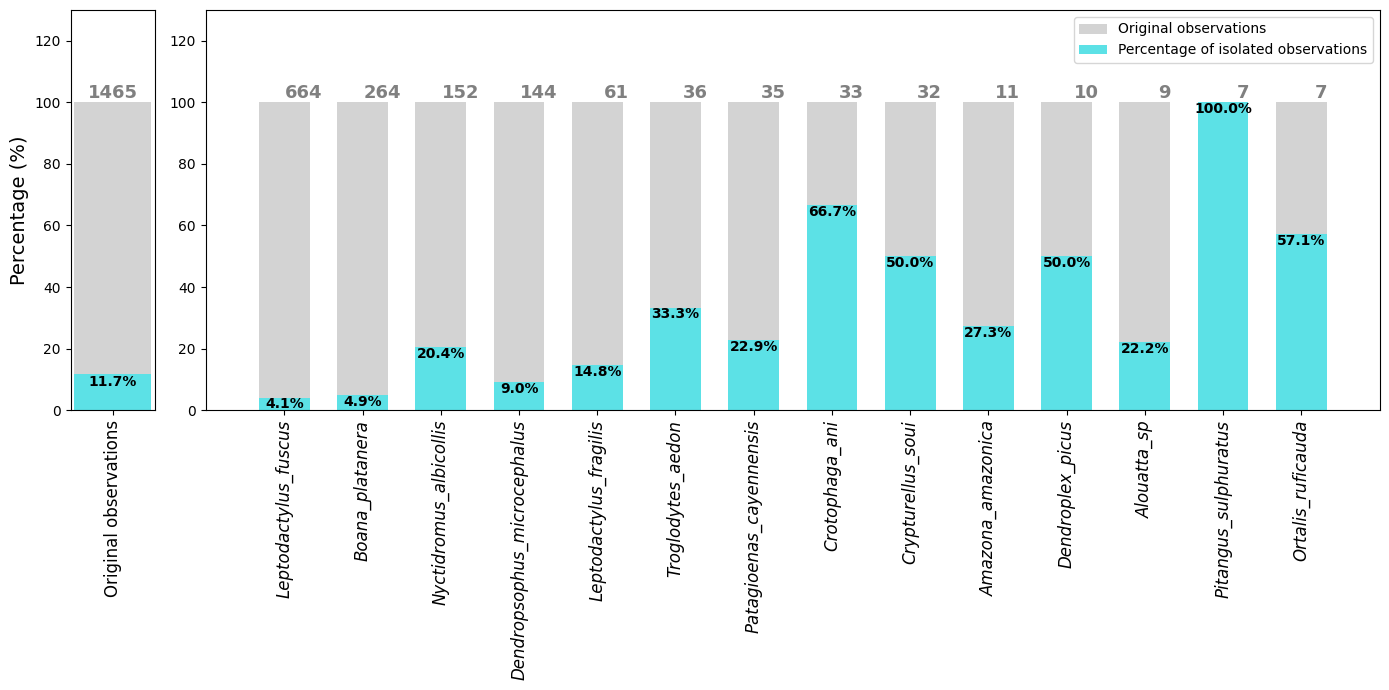

In [13]:
only_features_scaled = scale_features(df_reduced) # Divide data in Features and Labels. Scale Features and convert to Data Frame with same index as df_reduced
lonely_observations, lonely_observations_df = find_lonely_observations(df_reduced, only_features_scaled) # Find isolated observations from 

#Calculate the percentage of "lonely" observations
num_lonely_observations = len(lonely_observations_df)
num_total_observations = len(df_reduced)
percentage_lonely = (num_lonely_observations / num_total_observations) * 100

# Display the result
print(f'\nThe total number of observations is: {num_total_observations}')
print(f'The number of lonely observations is: {num_lonely_observations}')
print(f"Percentage of lonely observations in relation with the Dataset: {percentage_lonely:.2f}%")


plot_isolated_observations(df_reduced, lonely_observations_df)

In [14]:
lonely_observations_df.to_excel(output_path+dataset+output_file, index=False)
lonely_observations_df


,Lonely Index,Specie_ID,Nearest Same Label Index,Distance
0,2580,Crotophaga_ani,2606,12
1,4999,Patagioenas_cayennensis,4958,23
2,4787,Troglodytes_aedon,4797,1
3,2192,Pitangus_sulphuratus,2578,388
4,4810,Troglodytes_aedon,4787,1
...,...,...,...,...
167,1577,Boana_platanera,273,223
168,7942,Leptodactylus_fuscus,6697,1
169,10150,Nyctidromus_albicollis,10519,2
170,10140,Nyctidromus_albicollis,9053,12


## Dendrogram of isolated observations.

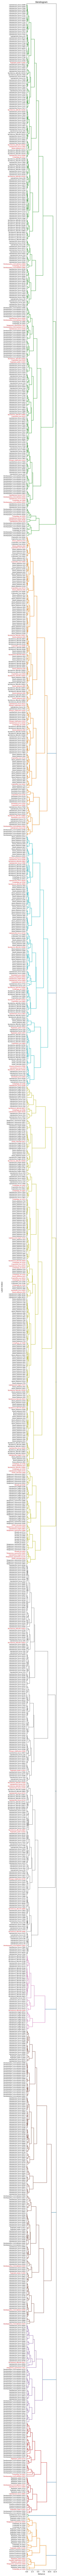

In [15]:
plot_dendrogram_lonelylabels(df_reduced, only_features_scaled, lonely_observations)

## Distance plot of isolated observations

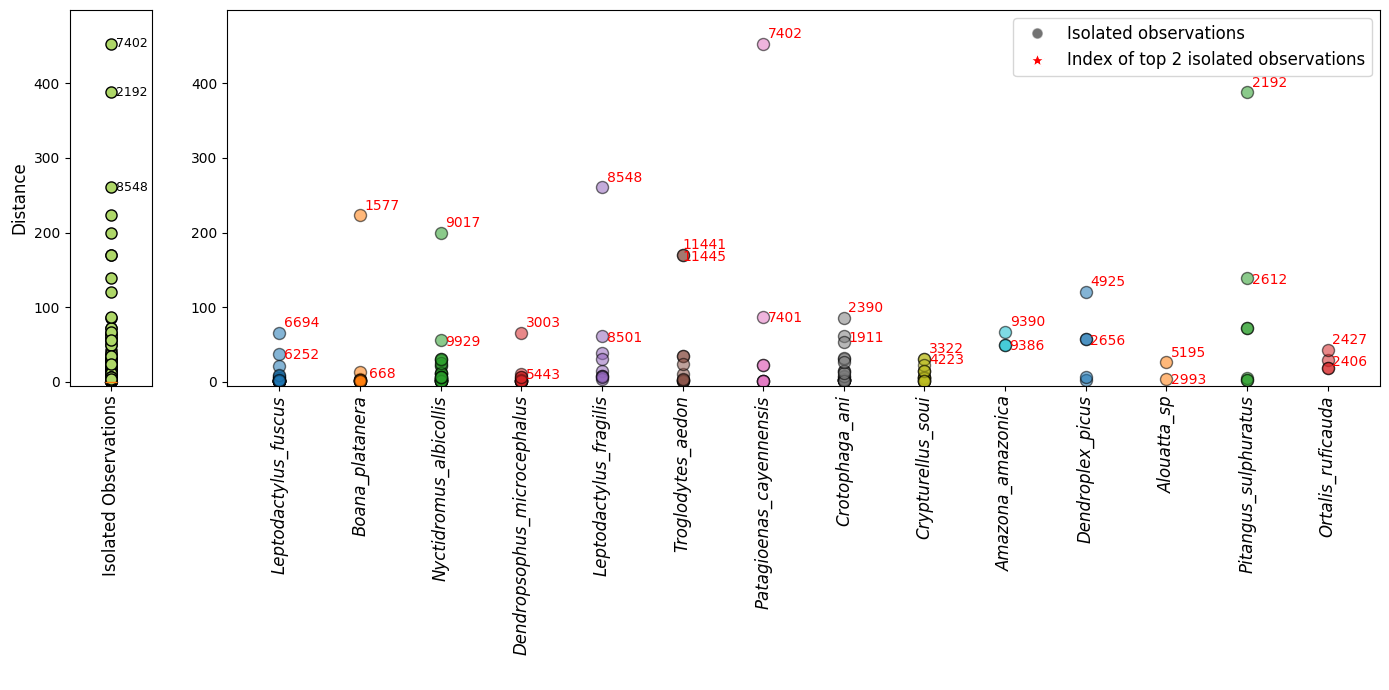

The total number of outliers is: 172
The total number of isolated observations is: 172


In [16]:
outliers = plot_outliers(df_reduced, lonely_observations_df)
#plot_isolated_observations_by_species(df_reduced, lonely_observations_df)
# Calculate the number of outliers
num_outliers = len(outliers)
print(f'The total number of outliers is: {num_outliers}')
print(f'The total number of isolated observations is: {num_lonely_observations}')

# Create Pseudo Cleaning Dataset
by removing labels from the original dataset that are part of lonely labels.
Output: pseudo_clean_df

In [17]:
indices_to_remove = lonely_observations_df['Lonely Index']
pseudo_clean_df = df_reduced.drop(indices_to_remove)

### Compute false positives
False positives are isolated observations detected on pseudo clean dataset

In [18]:
only_features_scaled = scale_features(pseudo_clean_df)
lonely_observations_filtered, lonely_observations_filtered_df = find_lonely_observations(pseudo_clean_df, only_features_scaled)

(observations_high_review, observations_moderate_review, observations_moderate_high_review, observations_low_review) = process_lonely_observations(pseudo_clean_df, lonely_observations_filtered_df)

#Calculate the percentage of "lonely" observations
num_lonely_observations = len(lonely_observations_filtered_df)
num_total_observations = len(pseudo_clean_df)
percentage_lonely = (num_lonely_observations / num_total_observations) * 100

# Display the result}
# Print the results with the percentage in the same line
print(f"\nThe total number of observations of the Pseudo Clean Dataset is: {num_total_observations}")
print(f'The number of false positives is: {num_lonely_observations}')
print(f"Percentage of false positives in relation with the Pseudo Clean Dataset: {percentage_lonely:.2f}%")





The total number of observations of the Pseudo Clean Dataset is: 1293
The number of false positives is: 15
Percentage of false positives in relation with the Pseudo Clean Dataset: 1.16%


# Computing values on Artificially modified labels

In [19]:
# Apply the modification and get the modified DataFrame and modifications DataFrame
df_modified, modifications_df = modify_species_id(pseudo_clean_df, random_state=42)


### Reporting results of computed values over the artificially modified dataset

In [20]:
# Scale the features of the modified DataFrame
only_features_scaled = scale_features(df_modified)

# Find lonely observations in the modified DataFrame
lonely_observations, lonely_observations_modified_df = find_lonely_observations(df_modified, only_features_scaled)

(observations_high_review, observations_moderate_review, observations_moderate_high_review, observations_low_review) = process_lonely_observations(df_modified, lonely_observations_modified_df)

# Calculate the number of total observations and lonely observations
num_total_observations = len(pseudo_clean_df)
num_modified_indices = len(modifications_df)
num_lonely_observations = len(lonely_observations_modified_df)

# Calculate the percentage of lonely observations
percentage_lonely = (num_lonely_observations / num_total_observations) * 100
# Compute the percentage for moderate-high review potential observations
percentage_moderate_high_review = (len(observations_moderate_high_review) / num_total_observations)*100

# Display the results for lonely observations
print(f"The amount of artificially modified labels is: {num_modified_indices}")
print(f"The isolated observations detected by the method is: {num_lonely_observations} ({percentage_lonely:.2f}%)")


The amount of artificially modified labels is: 129
The isolated observations detected by the method is: 172 (13.30%)


## Confusion Matrix of artificially modified labels

## K-fold validation for the method

### computed on all isolated observations

In [21]:
k = 10  # Number of folds

# Initialize lists to store the results
confusion_matrices = []
tp_list = []
fp_list = []
fn_list = []
tn_list = []

precision_list = []
recall_list = []
f1_score_list = []
accuracy_list = []

np.random.seed(42)
for fold_number in range(k):  
    random_state = np.random.choice(range(1, 51))
   
    # Apply modifications and process the data
    df_modified, modifications_df = modify_species_id(pseudo_clean_df, random_state=random_state)
    only_features_scaled = scale_features(df_modified)
    lonely_observations, lonely_observations_modified_df = find_lonely_observations(df_modified, only_features_scaled)
    (obs_H, obs_M, obs_MH, obs_L) = process_lonely_observations(df_modified, lonely_observations_modified_df)


    modified_indices_set = set(modifications_df['Index'])
    lonely_indices_set = set(lonely_observations_modified_df['Lonely Index'])
    #lonely_indices_set = set(obs_MH['Lonely Index'])
    total_indices = set(pseudo_clean_df.index)   

    # Calculate confusion matrix and metrics
    confusion_matrix, classification_metrics, cm, TP, FP, FN, TN = calculate_confusion_matrix_and_metrics(modified_indices_set, lonely_indices_set, total_indices)

    # Store the confusion matrix and metrics
    confusion_matrices.append(confusion_matrix)
    tp_list.append(TP)
    fp_list.append(FP)
    fn_list.append(FN)
    tn_list.append(TN)

    # Extract and store the precision, recall, f1-score, and accuracy for "Modified" class
    precision_list.append(classification_metrics['Modified']['precision'])
    recall_list.append(classification_metrics['Modified']['recall'])
    f1_score_list.append(classification_metrics['Modified']['f1-score'])
    accuracy_list.append(classification_metrics['accuracy'])



Average true positives across 10 folds: 126.20 ± 1.9
Average false positives 10 folds: 43.00 ± 6.4
Average false negatives across 10 folds: 2.80 ± 2e+00
Average true negatives across 10 folds: 1121.00 ± 6.4
Average isolated observations detected: 169.2 ± 7.1

Average Precision across 10 folds: 0.75 ± 0.03
Average Recall across 10 folds: 0.98 ± 0.01
Average F1-Score across 10 folds: 0.85 ± 0.02
Average Accuracy across 10 folds: 0.96 ± 0.01

Average Confusion Matrix across all folds:


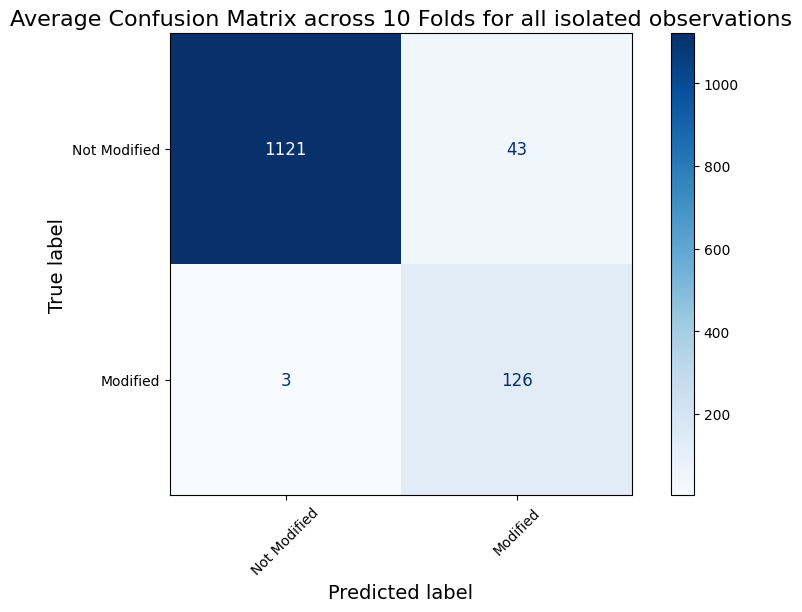

In [22]:
#Calculate average metrics across all folds
avg_tp = np.mean(tp_list)
avg_fp = np.mean(fp_list)
avg_fn = np.mean(fn_list)
avg_tn = np.mean(tn_list)

#Calculate standard deviation metrics across all folds
std_tp = np.std(tp_list)
std_fp = np.std(fp_list)
std_fn = np.std(fn_list)
std_tn = np.std(tn_list)

# Print the average metrics with standard deviation
print("\nAverage true positives across 10 folds: {:.2f} ± {:.1f}".format(avg_tp, std_tp))
print("Average false positives 10 folds: {:.2f} ± {:.1f}".format(avg_fp, std_fp))
print("Average false negatives across 10 folds: {:.2f} ± {:.1}".format(avg_fn, std_fn))
print("Average true negatives across 10 folds: {:.2f} ± {:.1f}".format(avg_tn, std_tn))


# Calculate the sum of TP and FP for each fold (previously called lonely_observations)
lonely_obs_sum = np.array(tp_list) + np.array(fp_list)

# Calculate the average of the summed lonely observations
avg_lonely_obs_sum = np.mean(lonely_obs_sum)

# Calculate the standard deviation of the summed lonely observations
std_lonely_obs_sum = np.std(lonely_obs_sum, ddof=1)

# Calcular y mostrar el resultado con formateo
print(f"Average isolated observations detected: {avg_lonely_obs_sum:.1f} ± {std_lonely_obs_sum:.1f}")



# Calculate average precision, recall, f1-score, and accuracy
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1_score = np.mean(f1_score_list)
avg_accuracy = np.mean(accuracy_list)

# Calculate standard deviation for each metric across all folds
std_precision = np.std(precision_list)
std_recall = np.std(recall_list)
std_f1_score = np.std(f1_score_list)
std_accuracy = np.std(accuracy_list)

# Print the average metrics with standard deviation
print("\nAverage Precision across 10 folds: {:.2f} ± {:.2f}".format(avg_precision, std_precision))
print("Average Recall across 10 folds: {:.2f} ± {:.2f}".format(avg_recall, std_recall))
print("Average F1-Score across 10 folds: {:.2f} ± {:.2f}".format(avg_f1_score, std_f1_score))
print("Average Accuracy across 10 folds: {:.2f} ± {:.2f}".format(avg_accuracy, std_accuracy))


# Calculate average confusion matrix
avg_confusion_matrix = pd.DataFrame({
    'Predicted Modified': [avg_tp, avg_fp],
    'Predicted Not Modified': [avg_fn, avg_tn]
}, index=['Actual Modified', 'Actual Not Modified'])


# Display the average confusion matrix
print("\nAverage Confusion Matrix across all folds:")
#print(avg_confusion_matrix)

# Prepare the confusion matrix for plotting (correct order)
cm = np.array([[avg_tn, avg_fp], [avg_fn, avg_tp]])
cm_rounded = np.round(cm)
cm_rounded = cm_rounded.astype(int)

plot_confusion_matrix(cm_rounded, title='Average Confusion Matrix across 10 Folds for all isolated observations')

1. Precision:
Intuition: Of all the times the model predicted positive, how many times was it correct?
2. Accuracy:
Intuition: Out of all the predictions the model made, how often did it predict correctly?
3. Recall (also known as Sensitivity):
Intuition: Of all the actual positive cases, how many did the model correctly identify?